In [2]:
from manim import *
import numpy as np
import math
config.verbosity = "WARNING"

Manim Community v0.19.0

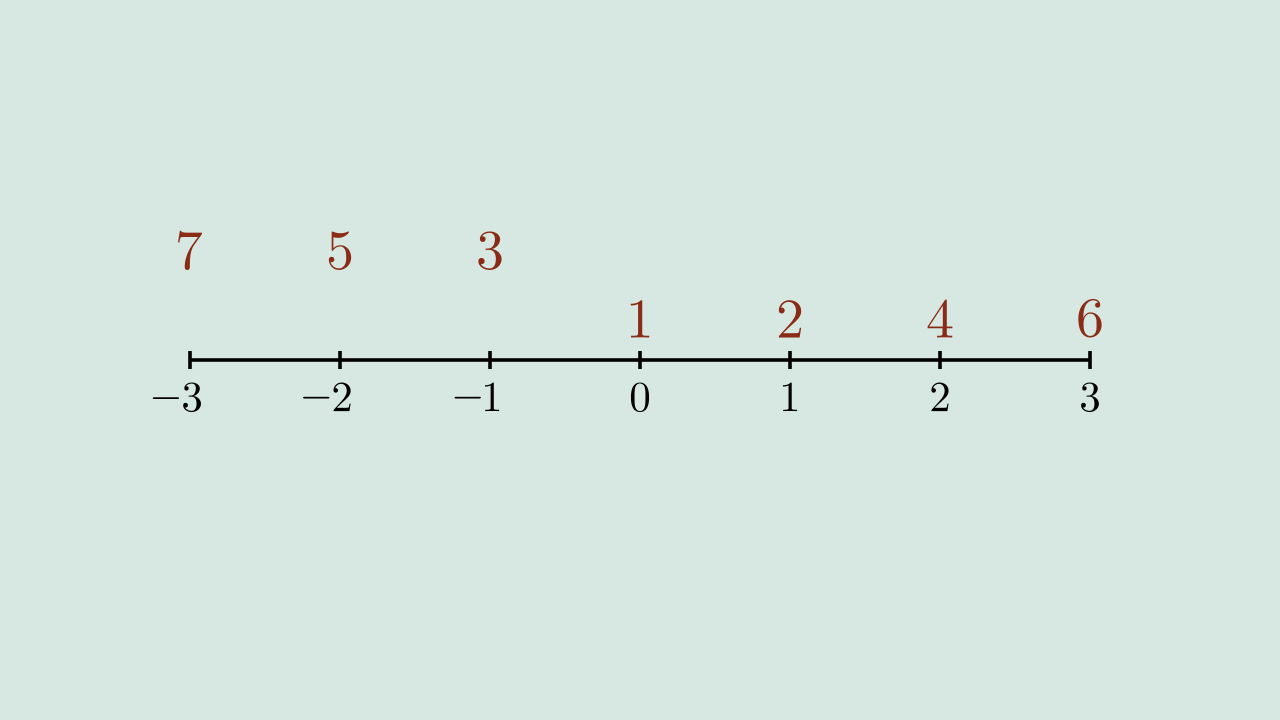

In [166]:
%%manim --quality=m --save_last_frame CountAllIntegers

class CountAllIntegers(Scene):
    def construct(self):
        """
        Draws a number line from -5 to 5
        The animates "counting" the number line by showing
        a new number above the number line. Starting with 0 over 0,
        1 over 1, then 2 over -1, then 3 over 2, 4 over -2 and so on.
        """
        self.camera.background_color = "#d6e8e1"
        number_line = NumberLine(x_range=[-3, 3, 1], length=10, include_numbers=True, color=BLACK, font_size=46, stroke_width=4)
        for number in number_line.numbers:
            number.set_color(BLACK)
        self.play(Create(number_line))
        # self.play(FadeIn(number_line), run_time=0.5)
        self.wait(0.5)


        positions = [0]
        for n in range(1, 4):
            positions.append(n)
            positions.append(-n)

        count = 0
        shown = set()
        for pos in positions:
            if pos in shown or pos < -3 or pos > 3:
                continue
            shown.add(pos)
            count += 1
            label = Integer(count, font_size=60, color="#8a2b16")
            label.next_to(number_line.n2p(pos), UP, buff=1 if pos < 0 else 0.25)
            # label.set_color("#d56e57")
            self.play(FadeIn(label), run_time=0.5)
            self.wait(0.4)
        
        self.wait(3)


Manim Community v0.19.0

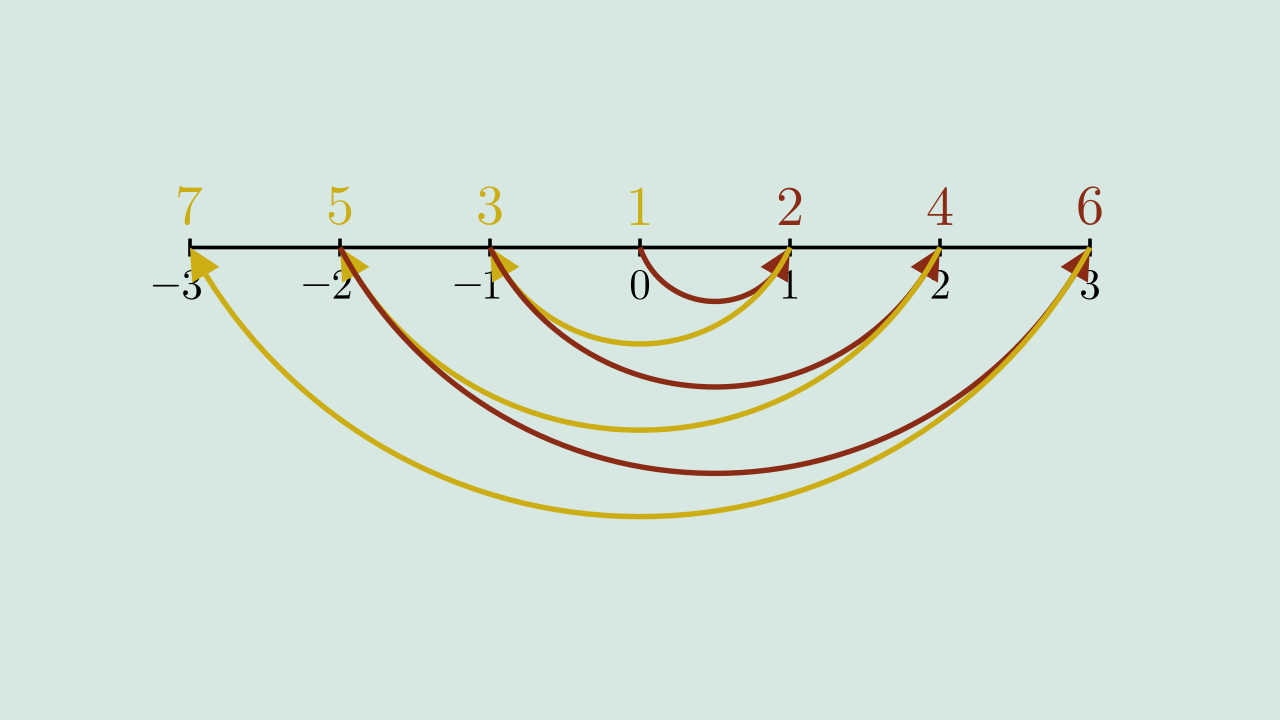

In [4]:
%%manim --quality=m --save_last_frame CountAllIntegersWithArrows

class CountAllIntegersWithArrows(Scene):
    def construct(self):
        """
        Draws a number line from -5 to 5
        The animates "counting" the number line by showing
        a new number above the number line. Starting with 0 over 0,
        1 over 1, then 2 over -1, then 3 over 2, 4 over -2 and so on.
        """
        self.camera.background_color = "#d6e8e1"
        number_line = NumberLine(x_range=[-3, 3, 1], length=10, include_numbers=True, color=BLACK, font_size=46, stroke_width=4)
        number_line.shift(UP * 1.25)
        for number in number_line.numbers:
            number.set_color(BLACK)
        self.play(FadeIn(number_line), run_time=0.2)
        # self.play(FadeIn(number_line), run_time=0.5)
        self.wait(0.5)


        positions = [0]
        for n in range(1, 4):
            positions.append(n)
            positions.append(-n)

        count = 0
        shown = set()
        last_pos = None
        for pos in positions:
            if pos in shown or pos < -3 or pos > 3:
                continue
            shown.add(pos)
            count += 1
            color = "#8a2b16" if pos > 0 else "#ccad13"
            label = Integer(count, font_size=60, color=color)
            label.next_to(number_line.n2p(pos), UP)
            # Draw a curving arrow from last_pos to pos
            if last_pos is not None:
                start = number_line.n2p(last_pos)
                end = number_line.n2p(pos)
                # Use a CurvedArrow with angle depending on direction
                angle = 120*math.pi/180 if pos > last_pos else -120*math.pi/180
                arrow = CurvedArrow(start, end, angle=angle, color=color, stroke_width=6)
                self.play(Create(arrow), run_time=0.5)
            self.play(FadeIn(label), run_time=0.5)
            self.wait(0.4)
            last_pos = pos
        self.wait(3)

In [168]:
# %%manim --quality=m BinaryDigitTable
# TODO: get new python with pyenv, then upgrade all packages and see what happens
from typing import Sequence


class BinaryDigitTable(Scene):
    def create_row_at_a_time(self, table: Table):
        animations: Sequence[Animation] = [
            FadeIn(
                VGroup(table.horizontal_lines, table.get_col_labels()),
            ),
        ]

        i = 0
        for row in table.get_rows():
            if i == 0:
                i += 1
                continue

            counter = Integer(i, font_size=45)
            counter.next_to(row[0], LEFT, buff=1)
            counter.set_color("#8a2b16")
            animations.append(FadeIn(counter))
            animations.append(FadeIn(row))
            i+=1

        return AnimationGroup(*animations, lag_ratio=1)
    
    def construct(self):
        """
        Draw a 6x5 grid without outside borders.
        The grid should look like this
          | - | 1 | 2 | 3 | 4 | 5
        1 | 0.| 0 | 0 | 0 | 0 | 0
        2 | 0.| 0 | 0 | 0 | 0 | 0
        3 | 0.| 0 | 0 | 0 | 0 | 0 
        4 | 0.| 0 | 0 | 0 | 0 | 0 
        """
        self.camera.background_color = "#d6e8e1"
        rows = 8
        cols = 6

        # Create the table data
        table_data = []
        col_labels =  [str(i+1) for i in range(cols-1)] + ["6..."]
        row_labels = ["0." for i in range(rows)]
        for i in range(rows):
            row = []
            for j in range(cols):
                row.append("0" if j < 5 else "0...")
            table_data.append(row)

        table = Table(
            table_data,
            row_labels=[Text(r, font="Noto Sans Mono") for r in row_labels],
            col_labels=[Text(r) for r in col_labels],
            include_outer_lines=False,
            line_config={"stroke_width": 2, "color": BLACK},
            element_to_mobject_config={"font_size": 36, "font": "Noto Sans Mono"},
        )
        lines: VGroup = table.vertical_lines
        for line in lines:
            line.set_opacity(0)

        # table.scale(0.9)
        table.move_to(UP)

        for item in table.get_entries():
            item.set_color(BLACK)

        self.play(self.create_row_at_a_time(table))
        self.wait(2)

Manim Community v0.19.0

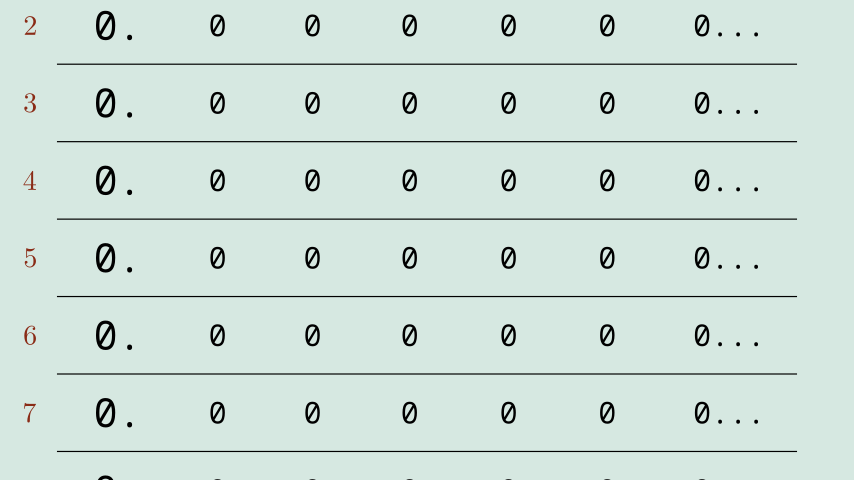

In [169]:
%manim --quality=l --save_last_frame BinaryDigitTable

['C059', 'D050000L', 'DejaVu Math TeX    text_mobject.py:467
                             Gyre', 'DejaVu Sans', 'DejaVu Sans Mono', 'DejaVu Serif', 'Droid                      
                             Sans Fallback', 'Latin Modern Math', 'Latin Modern Mono', 'Latin                      
                             Modern Mono Caps', 'Latin Modern Mono Light', 'Latin Modern Mono                      
                             Light Cond', 'Latin Modern Mono Prop', 'Latin Modern Mono Prop                        
                             Light', 'Latin Modern Mono Slanted', 'Latin Modern Roman', 'Latin                     
                             Modern Roman Caps', 'Latin Modern Roman Demi', 'Latin Modern Roman                    
                             Dunhill', 'Latin Modern Roman Slanted', 'Latin Modern Roman                           
                             Unslanted', 'Latin Modern Sans', 'Latin Modern Sans Demi Cond',                       
                             'Latin Modern Sans Quotation', 'Lato', 'Monospace', 'Nimbus Mono                      
                             PS', 'Nimbus Roman', 'Nimbus Sans', 'Nimbus Sans Narrow', 'Noto                       
                             Mono', 'Noto Sans Mono', 'P052', 'Sans', 'Serif', 'Standard                           
                             Symbols PS', 'System-ui', 'TeX Gyre Adventor', 'TeX Gyre Bonum',                      
                             'TeX Gyre Bonum Math', 'TeX Gyre Chorus', 'TeX Gyre Cursor', 'TeX                     
                             Gyre DejaVu Math', 'TeX Gyre Heros', 'TeX Gyre Heros Cn', 'TeX                        
                             Gyre Pagella', 'TeX Gyre Pagella Math', 'TeX Gyre Schola', 'TeX                       
                             Gyre Schola Math', 'TeX Gyre Termes', 'TeX Gyre Termes Math', 'URW                    
                             Bookman', 'URW Gothic', 'Ubuntu', 'Ubuntu Condensed', 'Ubuntu                         
                             Mono', 'Z003'].

In [262]:
from typing import Sequence, Tuple


class BinaryDigitTableStatic(Scene):
    highlight_color = "#efcf30" 
    highlight_border_color = "#1B1919"
    z_red = "#a83f28" 
    red_highlight = "#e2765e"
    def add_counter(self, table: Table):
        i = 0
        for row in table.get_rows():
            if i == 0:
                i += 1
                continue

            counter = Text(str(i), font_size=32)
            counter.next_to(row[0], LEFT, buff=0.5)
            counter.set_color(self.z_red)
            self.add(counter)

            i+=1
    
    def add_table(self) -> Table:
        rows = 9
        cols = 7

        # Create the table data
        table_data = []
        col_labels =  [str(i+1) for i in range(cols-1)] + ["…"]
        row_labels = ["0." for i in range(rows)]
        nums = [
            [1, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 1, 1],
            [1, 0, 1, 0, 0, 0, 0],
            [1, 0, 1, 0, 1, 0, 0],
            [1, 0, 0, 0, 1, 0, 0],
            [1, 1, 0, 0, 1, 0, 0],
            [1, 1, 0, 0, 0, 0, 0],
            [1, 0, 0, 0, 0, 0, 1],
            [1, 1, 0, 0, 0, 0, 0],
            [1, 1, 1, 1, 0, 0, 0],
            [1, 1, 1, 1, 1, 0, 0],
        ]
        for i in range(rows):
            row = []
            for j in range(cols):
                s = str(nums[i][j])
                row.append(s if j < (cols-1) else f"…")
            table_data.append(row)

        table = Table(
            table_data,
            row_labels=[Text(r, font="Noto Sans Mono", font_size=42) for r in row_labels],
            col_labels=[Text(r, font_size=28) for r in col_labels],
            include_outer_lines=False,
            line_config={"stroke_width": 2, "color": BLACK},
            element_to_mobject_config={"font_size": 42, "font": "Noto Sans Mono"},
            h_buff=0.2,
            v_buff=0.65,
            arrange_in_grid_config={"cell_alignment": DOWN}
        )
        lines: VGroup = table.vertical_lines
        for line in lines:
            line.set_opacity(0)


        for item in table.get_entries():
            item.set_color(BLACK)
        
        return table
        
    def make_table_highlight(self, table: Table, n: int):
        rows = table.row_dim
        cols = table.col_dim
        highlight_color = self.highlight_color

        row_cells = []
        col_cells = []
        for i in range(1, cols+2):
            r = table.get_highlighted_cell([n+1,i], color=highlight_color)
            r.set_opacity(0.5)
            row_cells.append(r)
        for j in range(2, rows+1):
            c = table.get_highlighted_cell([j,n+1], color=highlight_color)
            c.set_opacity(0.5)
            col_cells.append(c)

        row_highlight = VGroup(row_cells)
        col_highlight = VGroup(col_cells)
        for highlight in [row_highlight, col_highlight]:
            border = SurroundingRectangle(highlight, color=self.highlight_border_color, stroke_width=2, fill_opacity=0, buff=0)
            highlight.add(border)
        
        table.add_to_back(row_highlight)
        table.add_to_back(col_highlight)
        return row_highlight, col_highlight

    def add_chosen_number(self, central_divider):
        digits = ["0.", 0, 1, 0, 1, 0, 1, "…"]
        chosen_num = []
        for d in digits:
            rendered_d = Text(f"{d}", color=BLACK, font="Noto Sans Mono", font_size=82)
            chosen_num.append(rendered_d)
        for i in range(len(digits)):
            d = i if 0 < i < 7 else " "
            rendered_d = Text(f"{d}", color=BLACK, font_size=32)
            chosen_num.append(rendered_d)
            
        v = VGroup(chosen_num)
        self.add(v.arrange_in_grid(rows=2, cell_alignment=DOWN).next_to(central_divider, buff=1).shift(UP))
        return v

    def construct(self):
        """
        Draw a 6x5 grid without outside borders.
        The grid should look like this
          | - | 1 | 2 | 3 | 4 | 5
        1 | 0.| 0 | 0 | 0 | 0 | 0
        2 | 0.| 0 | 0 | 0 | 0 | 0
        3 | 0.| 0 | 0 | 0 | 0 | 0 
        4 | 0.| 0 | 0 | 0 | 0 | 0 
        """
        self.camera.background_color = "#d6e8e1"

        table = self.add_table()
        table.width = self.camera.frame_width*0.3
        table.to_edge(LEFT, buff=1)
        table.to_edge(UP, buff=0)
        self.add(table)
        self.add_counter(table)

        line = Line(
            table.get_right() + .7 * RIGHT - table.height * UP,
            table.get_right() + .7 * RIGHT + table.height * UP,
            color=BLACK,
            stroke_width=3
        )
        self.add(line)

        chosen = self.add_chosen_number(line)
        first_digit: VMobject = chosen[1]
        chosen_width = chosen[2].get_x() - first_digit.get_x()
        s = SurroundingRectangle(first_digit, fill_color=self.red_highlight, stroke_color=self.highlight_border_color, stroke_width=2)
        s.set_opacity(0.5)
        self.add(s)


        (row_highlight, col_highlight) = self.make_table_highlight(table, 1)
        col_width = col_highlight.width
        row_height = row_highlight.height

        rate_func = rate_functions.ease_in_out_expo
        per_digit_time = 1.5
        for i in range(6):
            self.play(AnimationGroup([
                col_highlight.animate(run_time=per_digit_time, rate_func=rate_func).shift(col_width * RIGHT),
                row_highlight.animate(run_time=per_digit_time, rate_func=rate_func).shift(row_height * DOWN),
                s.animate(run_time=per_digit_time, rate_func=rate_func).shift(chosen_width * RIGHT)
            ]))


Manim Community v0.19.0

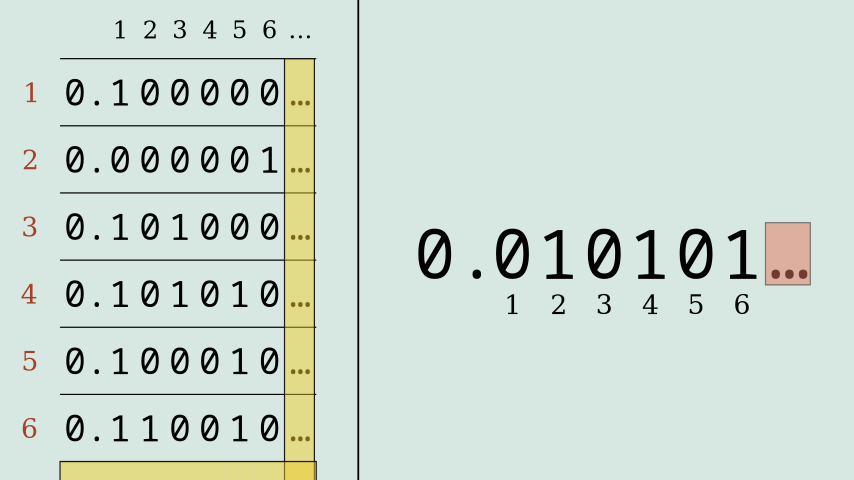

In [264]:
%manim --quality=l --save_last_frame BinaryDigitTableStatic

In [342]:
from typing import Sequence, Tuple


class BinaryDigitTableWithChosen(ZoomedScene):
    highlight_color = "#efcf30" 
    highlight_border_color = "#1B1919"
    z_red = "#a83f28" 
    red_highlight = "#e2765e"
    z_green = "#d6e8e1"

    def __init__(self, **kwargs):
        ZoomedScene.__init__(
            self,
            zoom_factor=1,
            zoomed_display_height=1,
            zoomed_display_width=6,
            image_frame_stroke_width=5,
            zoomed_camera_config={
                "default_frame_stroke_width": 3,
                "background_color": self.z_green,
                "background_opacity": 0.5,
            },
            **kwargs
        )
    def add_counter(self, table: Table):
        i = 0
        for row in table.get_rows():
            if i == 0:
                i += 1
                continue

            counter = Text(str(i), font_size=32)
            counter.next_to(row[0], LEFT, buff=0.5)
            counter.set_color(self.z_red)
            self.add(counter)

            i+=1
    
    def add_table(self) -> Table:
        rows = 9
        cols = 7

        # Create the table data
        table_data = []
        col_labels =  [str(i+1) for i in range(cols-1)] + ["…"]
        row_labels = ["0." for i in range(rows)]
        nums = [
            [1, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 1, 1],
            [1, 0, 1, 0, 0, 0, 0],
            [1, 0, 1, 0, 1, 0, 0],
            [1, 0, 0, 0, 1, 0, 0],
            [1, 1, 0, 0, 1, 0, 0],
            [1, 1, 0, 0, 0, 0, 0],
            [1, 0, 0, 0, 0, 0, 1],
            [1, 1, 0, 0, 0, 0, 0],
            [1, 1, 1, 1, 0, 0, 0],
            [1, 1, 1, 1, 1, 0, 0],
        ]
        for i in range(rows):
            row = []
            for j in range(cols):
                s = str(nums[i][j])
                row.append(s if j < (cols-1) else f"…")
            table_data.append(row)

        table = Table(
            table_data,
            row_labels=[Text(r, font="Noto Sans Mono", font_size=42) for r in row_labels],
            col_labels=[Text(r, font_size=28) for r in col_labels],
            include_outer_lines=False,
            line_config={"stroke_width": 2, "color": BLACK},
            element_to_mobject_config={"font_size": 42, "font": "Noto Sans Mono"},
            h_buff=0.2,
            v_buff=0.65,
            arrange_in_grid_config={"cell_alignment": DOWN}
        )
        lines: VGroup = table.vertical_lines
        for line in lines:
            line.set_opacity(0)


        for item in table.get_entries():
            item.set_color(BLACK)
        
        return table
        
    def make_table_highlight(self, table: Table, n: int):
        rows = table.row_dim
        cols = table.col_dim
        highlight_color = self.highlight_color

        row_cells = []
        col_cells = []
        for i in range(1, cols+2):
            r = table.get_highlighted_cell([n+1,i], color=highlight_color)
            r.set_opacity(0.5)
            row_cells.append(r)
        for j in range(2, rows+1):
            c = table.get_highlighted_cell([j,n+1], color=highlight_color)
            c.set_opacity(0.5)
            col_cells.append(c)

        row_highlight = VGroup(row_cells)
        col_highlight = VGroup(col_cells)
        for highlight in [row_highlight, col_highlight]:
            border = SurroundingRectangle(highlight, color=self.highlight_border_color, stroke_width=2, fill_opacity=0, buff=0)
            highlight.add(border)
        
        table.add_to_back(row_highlight)
        table.add_to_back(col_highlight)
        return row_highlight, col_highlight

    def add_chosen_number(self, central_divider):
        digits = ["0.", 0, 1, 0, 1, 0, 1, "…"]
        chosen_num = []
        for d in digits:
            rendered_d = Text(f"{d}", color=BLACK, font="Noto Sans Mono", font_size=82)
            chosen_num.append(rendered_d)
        for i in range(len(digits)):
            d = i if 0 < i < 7 else " "
            rendered_d = Text(f"{d}", color=BLACK, font_size=32)
            chosen_num.append(rendered_d)
            
        v = VGroup(chosen_num)
        self.add(v.arrange_in_grid(rows=2, cell_alignment=DOWN).next_to(central_divider, buff=1).shift(UP))
        return v

    def construct(self):
        """
        Draw a 6x5 grid without outside borders.
        The grid should look like this
          | - | 1 | 2 | 3 | 4 | 5
        1 | 0.| 0 | 0 | 0 | 0 | 0
        2 | 0.| 0 | 0 | 0 | 0 | 0
        3 | 0.| 0 | 0 | 0 | 0 | 0 
        4 | 0.| 0 | 0 | 0 | 0 | 0 
        """
        self.camera.background_color = self.z_green

        table = self.add_table()
        table.width = self.camera.frame_width*0.3
        table.to_edge(LEFT, buff=1)
        table.to_edge(UP, buff=0)
        self.add(table)
        self.add_counter(table)

        line = Line(
            table.get_right() + .7 * RIGHT - table.height * UP,
            table.get_right() + .7 * RIGHT + table.height * UP,
            color=BLACK,
            stroke_width=3
        )
        self.add(line)

        chosen = self.add_chosen_number(line)
        first_digit: VMobject = chosen[1]
        chosen_width = chosen[2].get_x() - first_digit.get_x()
        s = SurroundingRectangle(first_digit, fill_color=self.red_highlight, stroke_color=self.highlight_border_color, stroke_width=2)
        s.set_opacity(0.5)
        self.add(s)

        (row_highlight, col_highlight) = self.make_table_highlight(table, 1)
        col_width = col_highlight.width
        row_height = row_highlight.height


        self.zoomed_display.next_to(chosen, UP, buff=1.25)
        self.zoomed_camera.frame.move_to(table.get_rows()[1]).shift(LEFT*0.2)
        self.zoomed_camera.frame.width = table.get_rows()[1].width*1.3

        self.wait(.5)
        self.activate_zooming(animate=True)

        rate_func = rate_functions.ease_in_out_expo
        per_digit_time = 1.5
        for i in range(6):
            self.play(AnimationGroup([
                col_highlight.animate(run_time=per_digit_time, rate_func=rate_func).shift(col_width * RIGHT),
                row_highlight.animate(run_time=per_digit_time, rate_func=rate_func).shift(row_height * DOWN),
                self.zoomed_camera.frame.animate(run_time=per_digit_time, rate_func=rate_func).shift(row_height*DOWN),
                s.animate(run_time=per_digit_time, rate_func=rate_func).shift(chosen_width * RIGHT)
            ]))

Manim Community v0.19.0

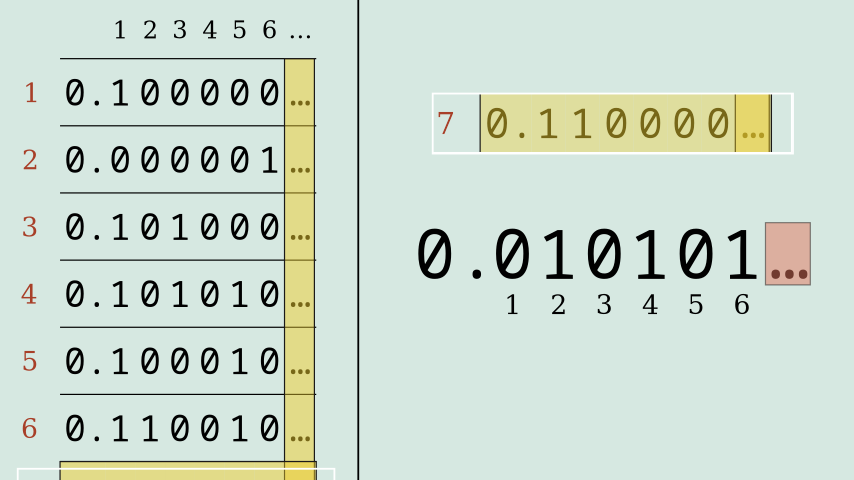

In [344]:
%manim --quality=l --save_last_frame BinaryDigitTableWithChosen

In [346]:
%manim --quality=m BinaryDigitTableWithChosen

Manim Community v0.19.0

In [345]:
%manim --quality=h BinaryDigitTableWithChosen

Manim Community v0.19.0